<a href="https://colab.research.google.com/github/dantv2002/PracticeML/blob/main/review_cnn_cifar10_tfAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170498071/170498071 [==============================] - 4s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [3]:
# number of classes
CLASS = len(set(y_train))
print("number of classes:", CLASS)

number of classes: 10


In [5]:
# Build the model
input = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(CLASS, activation='softmax')(x)

model = Model(input, output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0     

In [6]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Training
logs = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 25s 10ms/step - loss: 1.3050 - accuracy: 0.5501 - val_loss: 1.1445 - val_accuracy: 0.6065
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8316 - accuracy: 0.7131 - val_loss: 1.0071 - val_accuracy: 0.6718
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6793 - accuracy: 0.7665 - val_loss: 0.6833 - val_accuracy: 0.7679
Epoch 4/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5785 - accuracy: 0.8008 - val_loss: 0.8381 - val_accuracy: 0.7225
Epoch 5/50
1563/1563 [==============================] - 15s 9ms/step - loss: 0.4891 - accuracy: 0.8316 - val_loss: 0.6324 - val_accuracy: 0.7940
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.4100 - accuracy: 0.8591 - val_loss: 0.6222 - val_accuracy: 0.8014
Epoch 7/50
1563/1563 [==============================] - 24s 15ms/step - loss: 0.3533 - accuracy: 0.8788 - val_loss: 0.6466 - 

In [8]:
print("Evaluate in testing set: ", model.evaluate(x_test, y_test))

313/313 [==============================] - 2s 5ms/step - loss: 0.8642 - accuracy: 0.8376
Evaluate in testing set:  [0.8642216920852661, 0.8375999927520752]


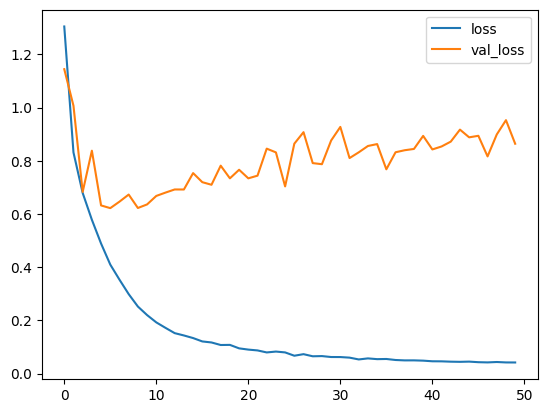

In [9]:
# Plot loss per epoch
import matplotlib.pyplot as plt
plt.plot(logs.history['loss'], label='loss')
plt.plot(logs.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

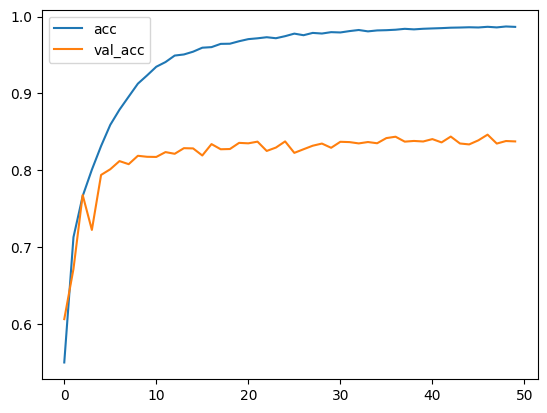

In [10]:
# Plot accuracy per epoch
plt.plot(logs.history['accuracy'], label='acc')
plt.plot(logs.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [11]:
# Training with data augmentation
# If run this cell AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
logs2 = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=15)

Epoch 1/15
1562/1562 [==============================] - 44s 27ms/step - loss: 0.7834 - accuracy: 0.7436 - val_loss: 0.5655 - val_accuracy: 0.8215
Epoch 2/15
1562/1562 [==============================] - 43s 28ms/step - loss: 0.6218 - accuracy: 0.7941 - val_loss: 0.5436 - val_accuracy: 0.8230
Epoch 3/15
1562/1562 [==============================] - 43s 27ms/step - loss: 0.5756 - accuracy: 0.8068 - val_loss: 0.4935 - val_accuracy: 0.8327
Epoch 4/15
1562/1562 [==============================] - 44s 28ms/step - loss: 0.5450 - accuracy: 0.8166 - val_loss: 0.4656 - val_accuracy: 0.8441
Epoch 5/15
1562/1562 [==============================] - 44s 28ms/step - loss: 0.5225 - accuracy: 0.8243 - val_loss: 0.4526 - val_accuracy: 0.8485
Epoch 6/15
1562/1562 [==============================] - 43s 28ms/step - loss: 0.4982 - accuracy: 0.8313 - val_loss: 0.4499 - val_accuracy: 0.8488
Epoch 7/15
1562/1562 [==============================] - 42s 27ms/step - loss: 0.4849 - accuracy: 0.8349 - val_loss: 0.4891 -

In [12]:
print("Evaluate in testing set after training with data augmentation: ", model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.4041 - accuracy: 0.8647
Evaluate in testing set after training with data augmentation:  [0.4040544629096985, 0.8647000193595886]


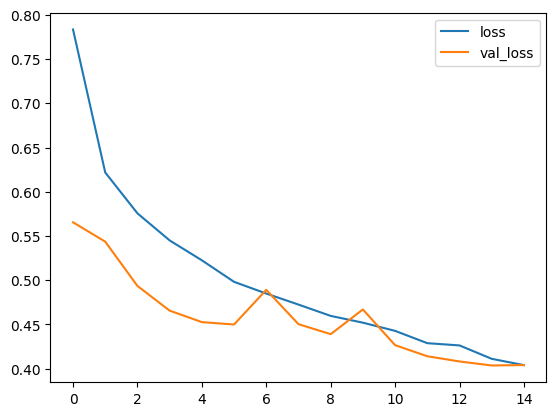

In [16]:
# Plot loss per epoch
import matplotlib.pyplot as plt
plt.plot(logs2.history['loss'], label='loss')
plt.plot(logs2.history['val_loss'], label='val_loss')
plt.legend()

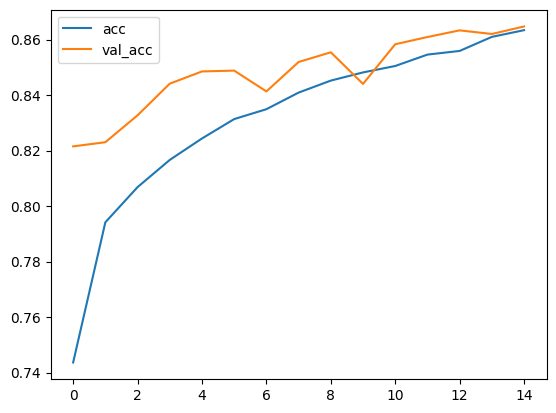

In [14]:
# Plot accuracy per epoch
plt.plot(logs2.history['accuracy'], label='acc')
plt.plot(logs2.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[894   7  23  13   4   3   3   4  17  32]
 [  4 932   0   1   0   1   1   2   7  52]
 [ 40   1 788  42  17  37  44  17   4  10]
 [ 11   2  34 727  23 115  53  24   3   8]
 [ 14   2  45  58 782  20  38  37   1   3]
 [  2   1  23  91  14 825  10  28   0   6]
 [  5   1  20  37   6  12 916   1   2   0]
 [  5   0   7  18  10  22   7 926   0   5]
 [ 48  17   7   4   1   0   4   3 897  19]
 [  5  23   2   4   0   0   0   2   4 960]]


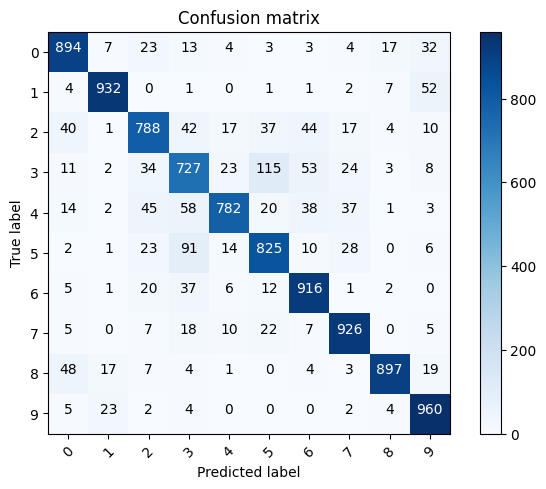

In [15]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [17]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

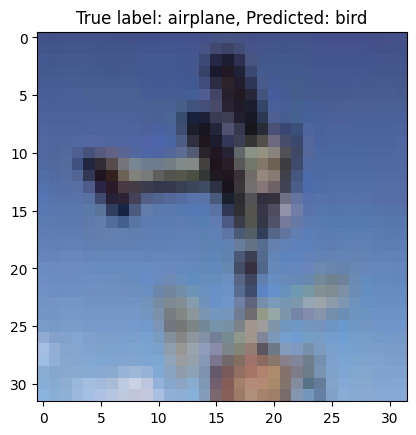

In [23]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s, Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));